In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Generate sample 2D data
# We create data with a clear direction of maximum variance for effective PCA
np.random.seed(42)
X_2d = np.dot(np.random.rand(2, 2), np.random.randn(2, 100)).T
X_2d[:, 1] = X_2d[:, 0] + np.random.randn(100) * 0.5 # Add correlation
print(f"Original shape: {X_2d.shape}")

Original shape: (100, 2)


In [3]:
# 2. Standardize the data (important for PCA)
scaler = StandardScaler()
X_2d_scaled = scaler.fit_transform(X_2d)


In [4]:
# 3. Apply PCA to reduce to 1 dimension
pca = PCA(n_components=1) # Specify the desired number of components
X_1d = pca.fit_transform(X_2d_scaled)
print(f"Transformed shape: {X_1d.shape}")

Transformed shape: (100, 1)


In [6]:
# 4. (Optional) Reconstruct the data for visualization of information loss
# The reconstructed data will lie on the first principal component axis in the original 2D space
X_reconstructed = pca.inverse_transform(X_1d)

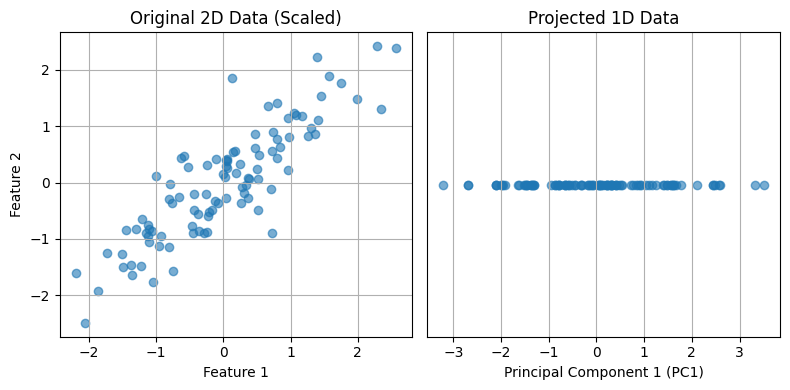

In [12]:
# 5. Visualization
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], alpha=0.6)
plt.title('Original 2D Data (Scaled)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.subplot(1, 2, 2)
# The 1D data is plotted as a horizontal line (y=0)
plt.scatter(X_1d, np.zeros_like(X_1d), alpha=0.6)
plt.title('Projected 1D Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.yticks([]) # Hide y-axis for 1D representation
plt.grid(True)
plt.tight_layout()
plt.show()
